# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

In [1]:
import cv2
import keras.layers as layers
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.utils import shuffle

Using TensorFlow backend.


---
## Step 0: Load The Data

In [33]:
# Load pickled data
import pickle
import csv

training_file = "../traffic-signs-data/train.p"
validation_file = "../traffic-signs-data/valid.p"
testing_file = "../traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [34]:
# Read sign names from csv file
class_names = {}
with open('signnames.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    for row in readCSV:
        class_names[row[0]] = row[1]


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [35]:
# Number of training examples
n_train = X_train.shape[0]

# Number of validation examples
n_validation = X_valid.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# Shape of a traffic sign image
image_shape = X_test[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

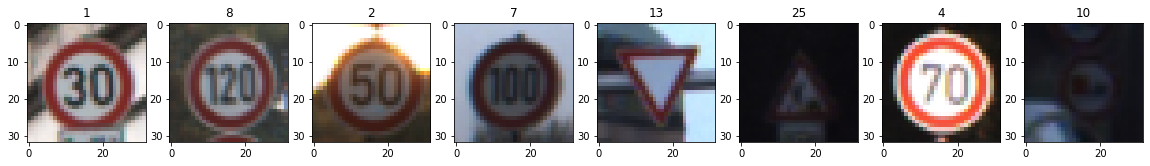

In [36]:
# Data exploration visualization

import matplotlib.pyplot as plt
import random
%matplotlib inline


#  Let's see 8 random imagaes from the dataset
indexes = [random.randint(0, len(X_train)) for i in range(8)]
fig, axs = plt.subplots(1,8, figsize=(20,5))

for i in range(8):
    axs[i].imshow(X_train[indexes[i]])
    axs[i].set_title(y_train[indexes[i]])



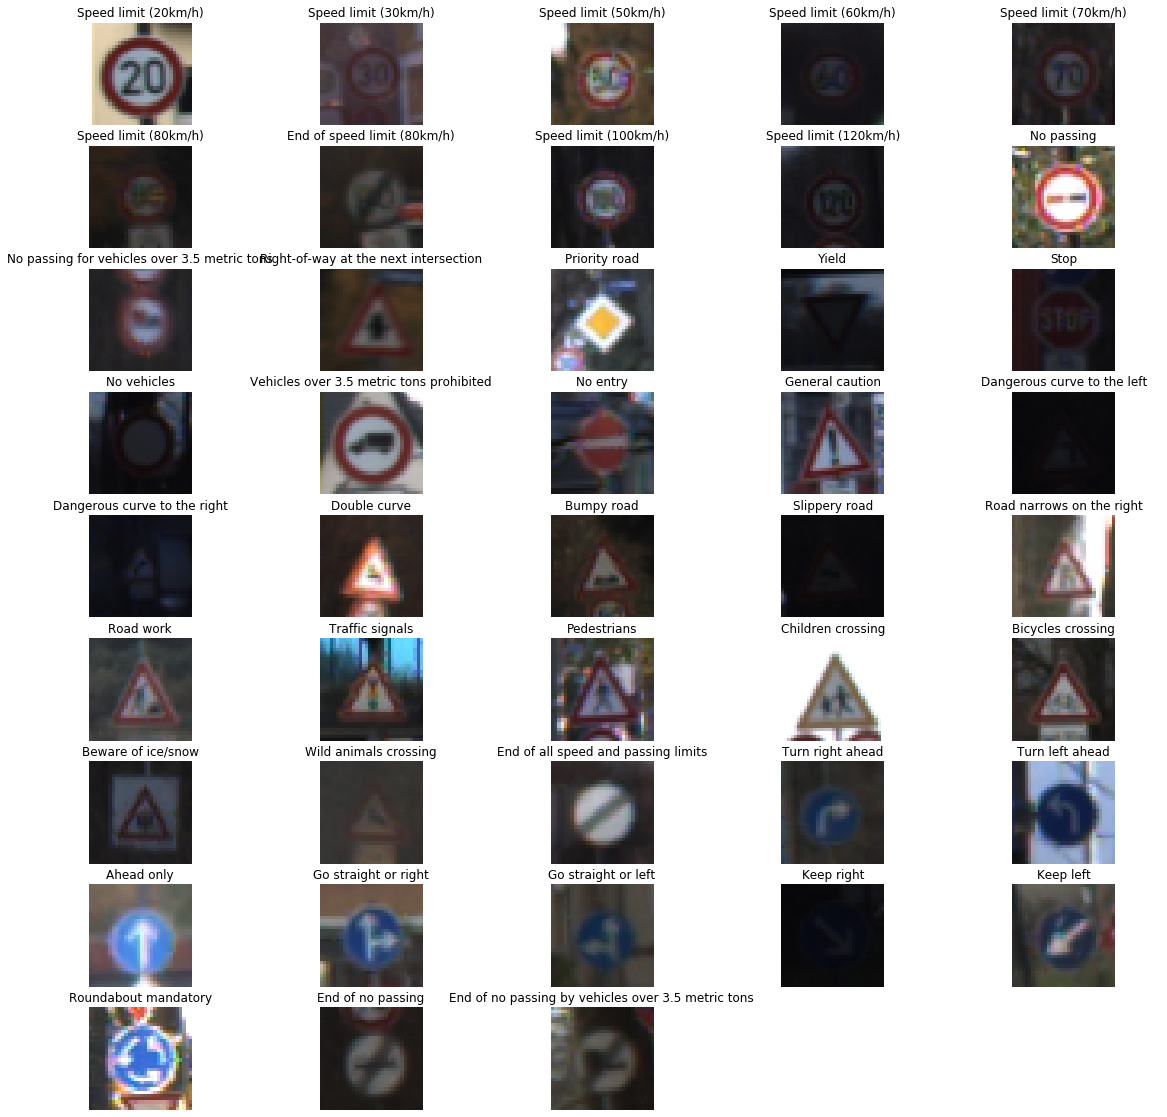

In [37]:
# Let's see one image from each class
fig, axs = plt.subplots(9,5, figsize=(20,20))

for i in range(45):
    axs[i//5,i%5].axis('off')
    if i < 43:
        axs[i//5,i%5].set_title(class_names[str(i)])
        ind = list(y_train).index(i)
        axs[i//5,i%5].imshow(X_train[ind])
    
plt.savefig('./output_images/data_exploration_signs.jpg')



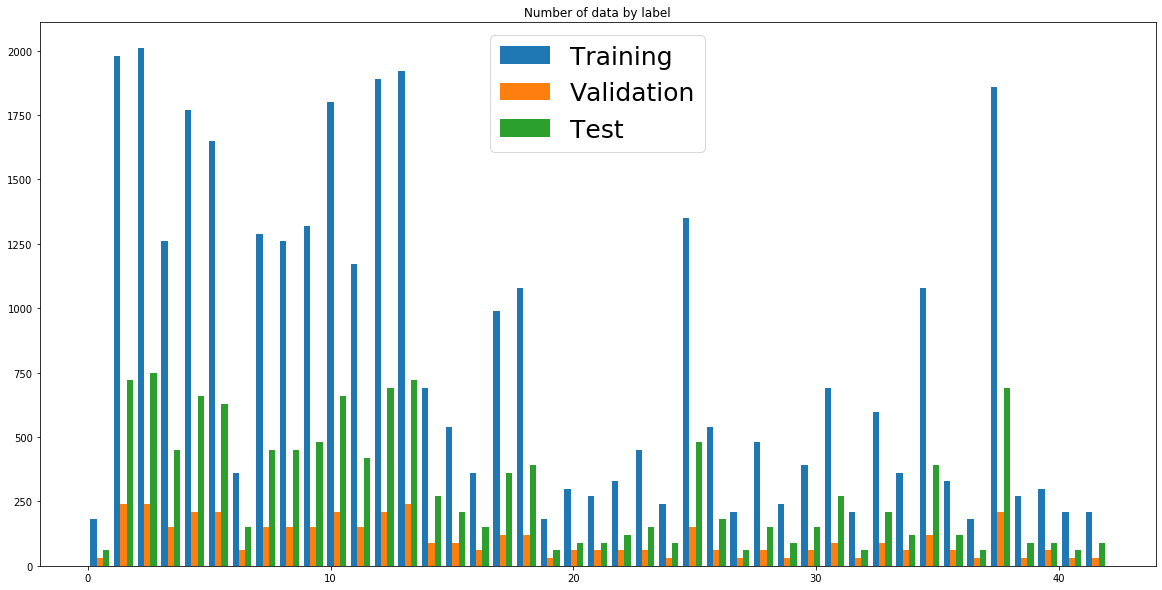

In [38]:
# The histogram of the labels in the data set
fig, ax = plt.subplots(figsize=(20,10))

x_multi = [y_train, y_valid, y_test]
labels = ['Training', 'Validation', 'Test']

ax.hist(x_multi, 43,histtype='bar', label=labels)
ax.set_title('Number of data by label')
ax.legend(prop={'size': 25})

plt.savefig('./output_images/number_data_by_label.jpg')

In [8]:
# Print class names
for i in range(43):
    #print('class '+ i + ' :' + class_names[str(i)])
    print('Class ' + str(i) + ': '+ class_names[str(i)])

Class 0: Speed limit (20km/h)
Class 1: Speed limit (30km/h)
Class 2: Speed limit (50km/h)
Class 3: Speed limit (60km/h)
Class 4: Speed limit (70km/h)
Class 5: Speed limit (80km/h)
Class 6: End of speed limit (80km/h)
Class 7: Speed limit (100km/h)
Class 8: Speed limit (120km/h)
Class 9: No passing
Class 10: No passing for vehicles over 3.5 metric tons
Class 11: Right-of-way at the next intersection
Class 12: Priority road
Class 13: Yield
Class 14: Stop
Class 15: No vehicles
Class 16: Vehicles over 3.5 metric tons prohibited
Class 17: No entry
Class 18: General caution
Class 19: Dangerous curve to the left
Class 20: Dangerous curve to the right
Class 21: Double curve
Class 22: Bumpy road
Class 23: Slippery road
Class 24: Road narrows on the right
Class 25: Road work
Class 26: Traffic signals
Class 27: Pedestrians
Class 28: Children crossing
Class 29: Bicycles crossing
Class 30: Beware of ice/snow
Class 31: Wild animals crossing
Class 32: End of all speed and passing limits
Class 33: Tur

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

Our goal is to have validation set accuracy of at least 0.93. 

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 255` is a quick way to approximately normalize the data and can be used in this project. 

In [9]:
X_train = X_train[]

# Shuffle the data
X_train, y_train = shuffle(X_train, y_train)

# Convert to grayscale and Normalize the data

XX_train = np.zeros(shape=(len(X_train),32, 32, 1))
for i in range(len(X_train)):
    gray_image = cv2.cvtColor(X_train[i,:,:,:], cv2.COLOR_RGB2GRAY)
    XX_train[i,:,:,0] = gray_image / 255.0 - 0.5

XX_valid = np.zeros(shape=(len(X_valid),32, 32, 1))
for i in range(len(X_valid)):
    gray_image = cv2.cvtColor(X_valid[i,:,:,:], cv2.COLOR_RGB2GRAY) 
    XX_valid[i,:,:,0] = gray_image / 255.0 - 0.5

XX_test = np.zeros(shape=(len(X_test),32, 32, 1))
for i in range(len(X_test)):
    gray_image = cv2.cvtColor(X_test[i,:,:,:], cv2.COLOR_RGB2GRAY) 
    XX_test[i,:,:,0] = gray_image / 255.0 - 0.5

X_train = XX_train
X_valid = XX_valid
X_test = XX_test

# Convert class numbers to binary class matrices
y_train_one_hot = tf.one_hot(y_train, 43)
y_valid_one_hot = tf.one_hot(y_valid, 43)
y_test_one_hot = tf.one_hot(y_test, 43)


### Model Architecture

In [16]:
# LeNet architecture
EPOCHS = 25
BATCH_SIZE = 128 
LEARNING_RATE = 0.001

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 1)),
    tf.keras.layers.MaxPool2D(strides=(2, 2)),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=120, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(units=84, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(units=43, activation = 'softmax')
])

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)               48120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 120)              

In [18]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [19]:
# Train the model
history = model.fit(X_train, y_train_one_hot, 
                    epochs=EPOCHS, 
                    batch_size=BATCH_SIZE, 
                    validation_data=(X_valid, y_valid_one_hot))

Train on 34799 samples, validate on 4410 samples
Epoch 1/25
34799/34799 [==============================] - 8s 234us/sample - loss: 2.7396 - accuracy: 0.2604 - val_loss: 1.3334 - val_accuracy: 0.6304
Epoch 2/25
34799/34799 [==============================] - 8s 223us/sample - loss: 1.0574 - accuracy: 0.6760 - val_loss: 0.6443 - val_accuracy: 0.8211
Epoch 3/25
34799/34799 [==============================] - 8s 222us/sample - loss: 0.6006 - accuracy: 0.8191 - val_loss: 0.4288 - val_accuracy: 0.8812
Epoch 4/25
34799/34799 [==============================] - 8s 221us/sample - loss: 0.4186 - accuracy: 0.8739 - val_loss: 0.3485 - val_accuracy: 0.8989
Epoch 5/25
34799/34799 [==============================] - 7s 215us/sample - loss: 0.3252 - accuracy: 0.9026 - val_loss: 0.2910 - val_accuracy: 0.9170
Epoch 6/25
34799/34799 [==============================] - 8s 218us/sample - loss: 0.2627 - accuracy: 0.9223 - val_loss: 0.2991 - val_accuracy: 0.9107
Epoch 7/25
34799/34799 [===========================

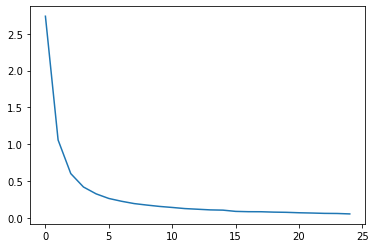

In [20]:
plt.plot(history.history['loss'])

In [21]:
# Evaluate the model
metrics = model.evaluate(X_test, y_test_one_hot, verbose=0)

for metric_i in range(len(model.metrics_names)):
    metric_name = model.metrics_names[metric_i]
    metric_value = metrics[metric_i]
    print('{}: {}'.format(metric_name, metric_value))
    

loss: 0.43403956749844635
accuracy: 0.9347584843635559


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

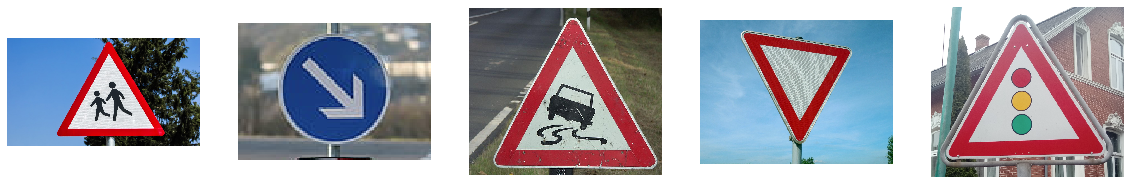

In [473]:
### Load the images and plot
new_images = []
new_images.append(cv2.imread('test_images/children crossing.jpg'))
new_images.append(cv2.imread('test_images/keep right.jpg'))
new_images.append(cv2.imread('test_images/slippery road.jpg'))
new_images.append(cv2.imread('test_images/yield.jpg'))
new_images.append(cv2.imread('test_images/traffic signals.jpg'))
new_images.append(cv2.imread('test_images/puppy.jpg'))


new_test = {}
new_test['features'] = np.array(new_images)
new_test['labels'] = [28, 38, 23, 13, 26]

fig, axs = plt.subplots(1,5, figsize=(20,5))

for i in range(5):
    img = cv2.cvtColor(new_test['features'][i],cv2.COLOR_BGR2RGB)
    axs[i].imshow(img)
    axs[i].axis('off')
    
X_new_test, y_new_test = new_test['features'], new_test['labels']


plt.savefig('./output_images/five_new_images.jpg')


In [474]:
XX_new_test = np.zeros(shape=(len(X_new_test),32, 32, 1))
for i, img in enumerate(X_new_test):
    
    # resize image
    resized = cv2.resize(img, (32, 32), interpolation = cv2.INTER_AREA)
    
    # convert image to grayscale
    gray_image = cv2.cvtColor(resized, cv2.COLOR_RGB2GRAY)
    
    # normalize image 
    XX_new_test[i,:,:,0] = gray_image / 255.0 - 0.5

X_new_test = XX_new_test

### Predict the Sign Type for Each Image

In [475]:
### Run the predictions here and use the model to output the prediction for each image.
predictions = model.predict(X_new_test[:])

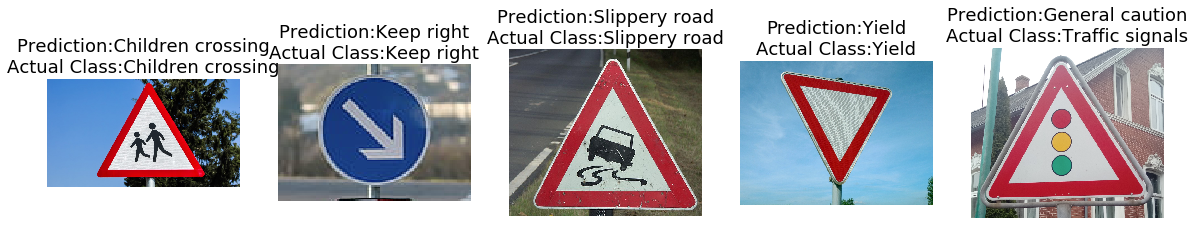

In [492]:
correct_classification_counter = 0

fig, axs = plt.subplots(1,5, figsize=(20,5))
for i, img in enumerate(X_new_test[:5]):
    axs[i].imshow(cv2.cvtColor(new_test['features'][i],cv2.COLOR_BGR2RGB))    
    axs[i].set_title('Prediction:' + class_names[str(np.argmax(predictions[i]))] + '\n'+'Actual Class:' + class_names[str(y_new_test[i])], fontsize=18)
    axs[i].axis('off')
    
    if np.argmax(predictions[i]) == y_new_test[i]:
        correct_classification_counter += 1    


plt.savefig('./output_images/test_new_images.jpg')



### Analyze Performance

In [477]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
accuracy = correct_classification_counter / len(X_new_test[:5])

print('Accuracy: ' + str(accuracy))

Accuracy: 0.8


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [478]:
tf.nn.top_k(predictions, k=5)

TopKV2(values=<tf.Tensor: shape=(6, 5), dtype=float32, numpy=
array([[9.9883944e-01, 8.3624449e-04, 1.4585092e-04, 1.4334072e-04,
        3.0985655e-05],
       [1.0000000e+00, 8.6790872e-13, 8.6553598e-18, 4.1830619e-19,
        3.6401052e-20],
       [9.9999690e-01, 3.0536462e-06, 1.1071313e-09, 4.1695900e-10,
        9.7274541e-12],
       [1.0000000e+00, 3.8287044e-13, 4.3222973e-15, 3.2432271e-19,
        8.1037141e-24],
       [8.3380538e-01, 1.6617842e-01, 1.5583024e-05, 5.5829167e-07,
        1.6554702e-08],
       [3.5888359e-01, 3.3602241e-01, 2.8869176e-01, 1.5717417e-02,
        4.3934592e-04]], dtype=float32)>, indices=<tf.Tensor: shape=(6, 5), dtype=int32, numpy=
array([[28, 20, 11, 27, 29],
       [38, 20, 10, 25, 34],
       [23, 30, 19, 10, 21],
       [13, 25, 35, 34, 38],
       [18, 26, 24, 27, 20],
       [ 1, 38,  0, 32,  8]], dtype=int32)>)

Image number 1 - Actual class: Children crossing
Model's top 5 classes: [28 20 11 27 29]
Model's top 5 softmax probabilities: [9.9883944e-01 8.3624449e-04 1.4585092e-04 1.4334072e-04 3.0985655e-05]

Model's top 5 classes with their probabilities:
- Children crossing --> 0.99883944
- Dangerous curve to the right --> 0.0008362445
- Right-of-way at the next intersection --> 0.00014585092
- Pedestrians --> 0.00014334072
- Bicycles crossing --> 3.0985655e-05


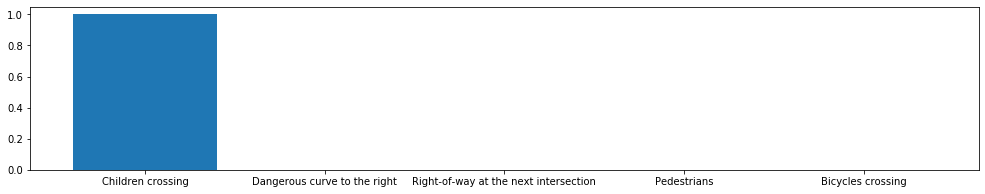

Image number 2 - Actual class: Keep right
Model's top 5 classes: [38 20 10 25 34]
Model's top 5 softmax probabilities: [1.0000000e+00 8.6790872e-13 8.6553598e-18 4.1830619e-19 3.6401052e-20]

Model's top 5 classes with their probabilities:
- Keep right --> 1.0
- Dangerous curve to the right --> 8.679087e-13
- No passing for vehicles over 3.5 metric tons --> 8.65536e-18
- Road work --> 4.183062e-19
- Turn left ahead --> 3.6401052e-20


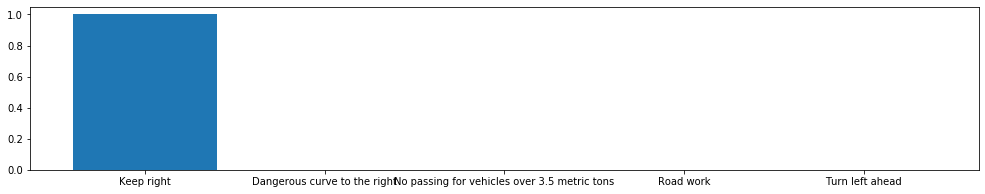

Image number 3 - Actual class: Slippery road
Model's top 5 classes: [23 30 19 10 21]
Model's top 5 softmax probabilities: [9.9999690e-01 3.0536462e-06 1.1071313e-09 4.1695900e-10 9.7274541e-12]

Model's top 5 classes with their probabilities:
- Slippery road --> 0.9999969
- Beware of ice/snow --> 3.0536462e-06
- Dangerous curve to the left --> 1.1071313e-09
- No passing for vehicles over 3.5 metric tons --> 4.16959e-10
- Double curve --> 9.727454e-12


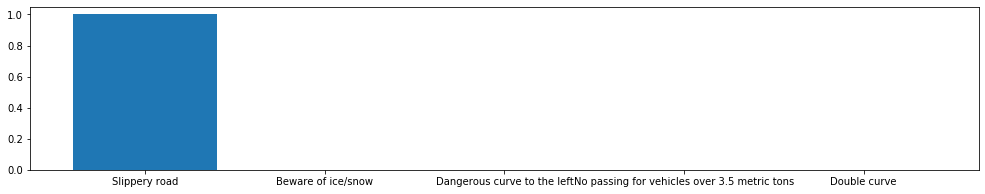

Image number 4 - Actual class: Yield
Model's top 5 classes: [13 25 35 34 38]
Model's top 5 softmax probabilities: [1.0000000e+00 3.8287044e-13 4.3222973e-15 3.2432271e-19 8.1037141e-24]

Model's top 5 classes with their probabilities:
- Yield --> 1.0
- Road work --> 3.8287044e-13
- Ahead only --> 4.3222973e-15
- Turn left ahead --> 3.243227e-19
- Keep right --> 8.103714e-24


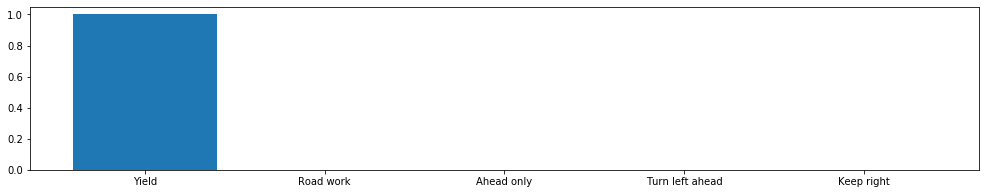

Image number 5 - Actual class: Traffic signals
Model's top 5 classes: [18 26 24 27 20]
Model's top 5 softmax probabilities: [8.3380538e-01 1.6617842e-01 1.5583024e-05 5.5829167e-07 1.6554702e-08]

Model's top 5 classes with their probabilities:
- General caution --> 0.8338054
- Traffic signals --> 0.16617842
- Road narrows on the right --> 1.5583024e-05
- Pedestrians --> 5.582917e-07
- Dangerous curve to the right --> 1.6554702e-08


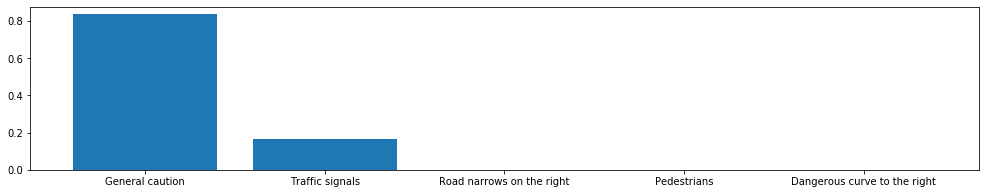

In [479]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
for i in range(len(predictions[:5])):
    top5_predictions = tf.nn.top_k(predictions[i], k=5)
    ind = top5_predictions.indices.numpy()
    val = top5_predictions.values.numpy()
    print('Image number '+ str(i+1) + ' - Actual class: ' + class_names[str(y_new_test[i])])
    print('Model\'s top 5 classes: '+ str(ind))
    print('Model\'s top 5 softmax probabilities: '+ str(val))
    
    print('\nModel\'s top 5 classes with their probabilities:')
    for j in range(5):
        print('- '+ class_names[str(ind[j])] + ' --> ' +str(val[j]))        
    
    fig, ax = plt.subplots(figsize=(17,3))
    classes = [class_names[str(i)] for i in ind] 
    probs = val
    ax.bar(classes,probs)
    plt.show()
    

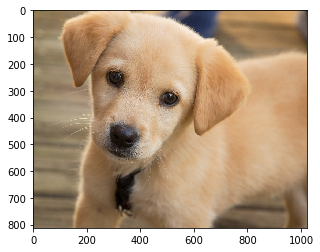

Model's top 5 classes: [ 1 38  0 32  8]
Model's top 5 softmax probabilities: [0.3588836  0.3360224  0.28869176 0.01571742 0.00043935]

Model's top 5 classes with their probabilities:
- Speed limit (30km/h) --> 0.3588836
- Keep right --> 0.3360224
- Speed limit (20km/h) --> 0.28869176
- End of all speed and passing limits --> 0.015717417
- Speed limit (120km/h) --> 0.00043934592


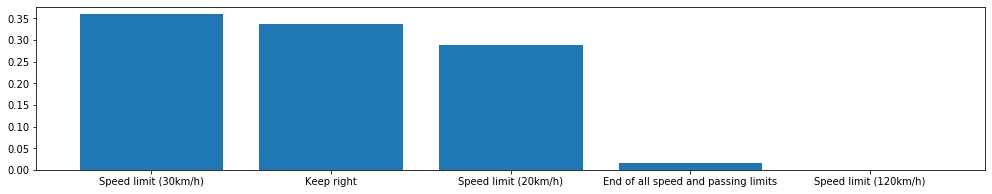

In [480]:
# Prediction for an image that is not a traffic sign. I chose an image of a puppy to test. 
fig, ax = plt.subplots()
plt.imshow(cv2.cvtColor(new_test['features'][5],cv2.COLOR_BGR2RGB))
plt.show()

top5_predictions = tf.nn.top_k(predictions[5], k=5)
ind = top5_predictions.indices.numpy()
val = top5_predictions.values.numpy()
print('Model\'s top 5 classes: '+ str(ind))
print('Model\'s top 5 softmax probabilities: '+ str(val))

print('\nModel\'s top 5 classes with their probabilities:')
for j in range(5):
    print('- '+class_names[str(ind[j])] + ' --> ' +str(val[j]))        

fig, ax = plt.subplots(figsize=(17,3))
classes = [class_names[str(i)] for i in ind] 
probs = val
ax.bar(classes,probs)
plt.show()


---

## Step 4: Visualize the Neural Network's State with Test Images

While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training the neural network we can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that 

In [481]:
### Visualize network's feature maps

# image_input: the test image being fed into the network to produce the feature maps
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, layer_name, activation_min=-1, activation_max=-1 ,plt_num=1):

    layer_output=model.get_layer(layer_name).output
    intermediate_model=tf.keras.models.Model(inputs=model.input,outputs=layer_output)
    activation=intermediate_model.predict(image_input.reshape(1,32,32,1))

    featuremaps = activation.shape[3]

    plt.figure(plt_num, figsize=(20,5))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

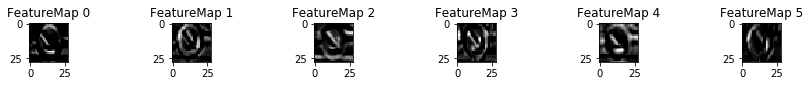

In [482]:
model.layers[0]._name='layer0'
outputFeatureMap(X_new_test[1], 'layer0')

plt.savefig('./output_images/first_layer_outout_keep_right.jpg')

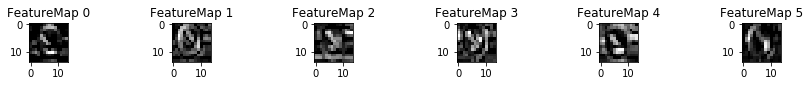

In [483]:
model.layers[1]._name='layer1'
outputFeatureMap(X_new_test[1], 'layer1')

plt.savefig('./output_images/second_layer_outout_keep_right.jpg')

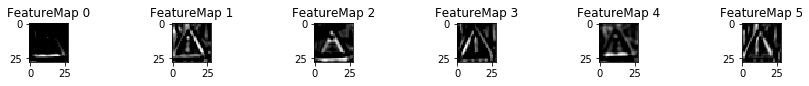

In [484]:
outputFeatureMap(X_new_test[4], 'layer0')

plt.savefig('./output_images/first_layer_outout_signal.jpg')

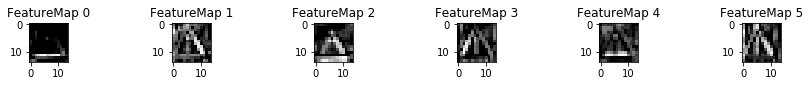

In [485]:
outputFeatureMap(X_new_test[4], 'layer1')

plt.savefig('./output_images/second_layer_outout_signal.jpg')

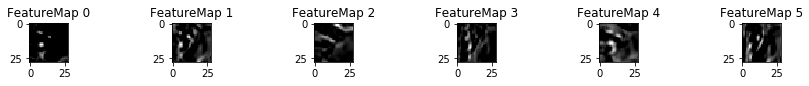

In [486]:
outputFeatureMap(X_new_test[5], 'layer0')

plt.savefig('./output_images/first_layer_outout_not_a_sign.jpg')

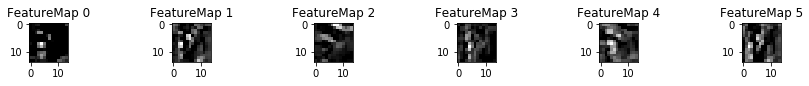

In [487]:
outputFeatureMap(X_new_test[5], 'layer1')

plt.savefig('./output_images/second_layer_outout_not_a_sign.jpg')